In [1]:
import requests as rq
import pandas as pd
import json
from StringIO import StringIO
import matplotlib.pyplot as plt

In [2]:
token = 'e2ce375f9642d036ff9362e829d26c273a2522a4'

payload = {'access_token': token, 'per_page': '50'}
headers = {'content-type': 'application/json'}#, 'login': token}

# Segments
# Farnley Line Full - 2314277

r = rq.get('https://www.strava.com/api/v3/segments/2314277/leaderboard', headers=headers, params=payload)

In [60]:
data = json.loads(r.text)
#print json.dumps(data, sort_keys=True, indent=4)
data = data['entries']

df = pd.DataFrame(data)
df['speed'] = 3.6*df['distance']/df['elapsed_time']
print df.info()
print df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 15 columns):
activity_id         50  non-null values
athlete_gender      49  non-null values
athlete_id          50  non-null values
athlete_name        50  non-null values
athlete_profile     50  non-null values
average_hr          21  non-null values
average_watts       47  non-null values
distance            50  non-null values
effort_id           50  non-null values
elapsed_time        50  non-null values
moving_time         50  non-null values
rank                50  non-null values
start_date          50  non-null values
start_date_local    50  non-null values
speed               50  non-null values
dtypes: float64(4), int64(6), object(5)None
Index([u'activity_id', u'athlete_gender', u'athlete_id', u'athlete_name', u'athlete_profile', u'average_hr', u'average_watts', u'distance', u'effort_id', u'elapsed_time', u'moving_time', u'rank', u'start_date', u'start_date_local', u'speed'], dtype=obje

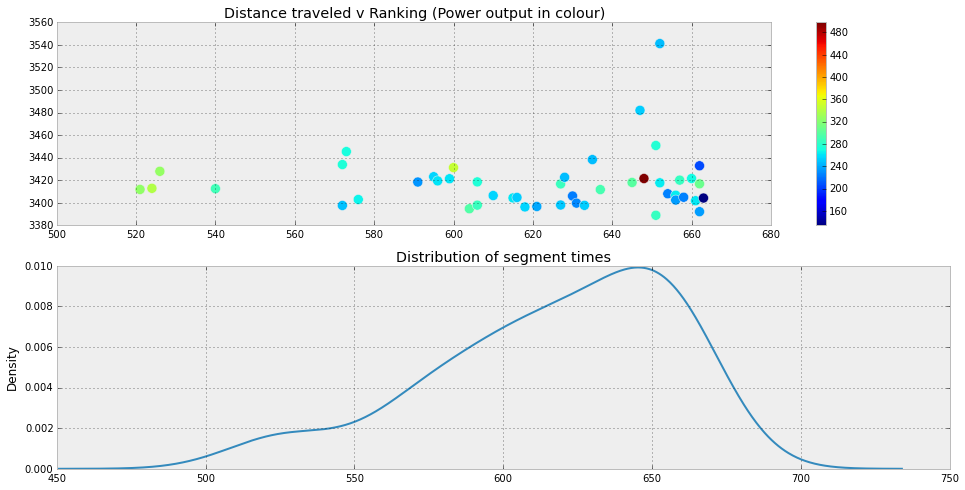

In [76]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(211)
plt.scatter(df['elapsed_time'], df['distance'], c=df['average_watts'],s=100)
plt.colorbar()
#ax1.set_xlim([0,51])
plt.title('Distance traveled v Ranking (Power output in colour)')

ax2 = fig.add_subplot(212)
plt.title('Distribution of segment times')
df['elapsed_time'].plot(kind='kde')

In [69]:
df['distance_delta'] = df['distance']-df['distance'].mean()
df['true_time'] = df['elapsed_time'] - 3.6*df['distance_delta']/df['speed']

In [68]:
print df.head()

   activity_id athlete_gender  athlete_id      athlete_name  \
0     61712139              M     1183222  chris fothergill   
1     48559099              M      304569    Michael Harris   
2    167671050              M     1326260        steve bray   
3     76197400           None     2645330   Huw Littlestone   
4    164519027              M     1503199     adam birdsall   

                                     athlete_profile  average_hr  \
0  http://dgalywyr863hv.cloudfront.net/pictures/a...       143.6   
1                           avatar/athlete/large.png       157.1   
2  http://dgalywyr863hv.cloudfront.net/pictures/a...         NaN   
3  http://dgalywyr863hv.cloudfront.net/pictures/a...         NaN   
4  http://dgalywyr863hv.cloudfront.net/pictures/a...         NaN   

   average_watts  distance   effort_id  elapsed_time  moving_time  rank  \
0          325.6    3411.8  1158267916           521          521     1   
1          339.0    3412.8   851546989           524          

In [70]:
print df[df['rank']==18][['athlete_name','distance','elapsed_time','speed', 'true_time']]

   athlete_name  distance  elapsed_time      speed   true_time
17  Phil Wilson    3397.9           606  20.185545  609.480946
18  Andy Mellor    3418.5           606  20.307921  605.808193


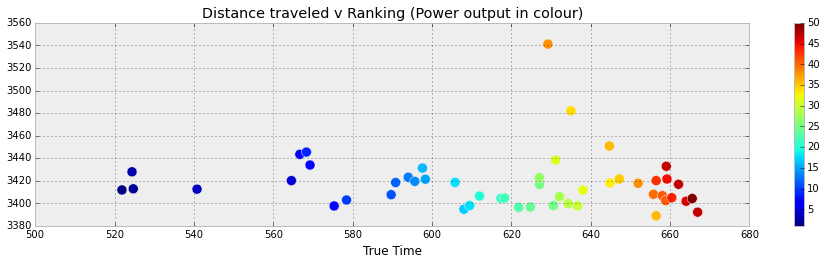

In [78]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(211)
plt.scatter(df['true_time'], df['distance'], c=df['rank'],s=100)
plt.colorbar()
ax1.set_xlabel('True Time')
plt.title('Distance traveled v Ranking (Power output in colour)')


In [10]:
token = 'e2ce375f9642d036ff9362e829d26c273a2522a4'

payload = {'access_token': token, 'per_page': '100'}
headers = {'content-type': 'application/json'}#, 'login': token}

# Segments
# Farnley Line Full - 2314277

r = rq.get('https://www.strava.com/api/v3/segments/2314277/leaderboard', headers=headers, params=payload)

In [11]:
data = json.loads(r.text)
#print json.dumps(data, sort_keys=True, indent=4)
data = data['entries']

df = pd.DataFrame(data)
df['speed'] = 3.6*df['distance']/df['elapsed_time']
print df.info()
print df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 15 columns):
activity_id         100  non-null values
athlete_gender      98  non-null values
athlete_id          100  non-null values
athlete_name        100  non-null values
athlete_profile     100  non-null values
average_hr          38  non-null values
average_watts       91  non-null values
distance            100  non-null values
effort_id           100  non-null values
elapsed_time        100  non-null values
moving_time         100  non-null values
rank                100  non-null values
start_date          100  non-null values
start_date_local    100  non-null values
speed               100  non-null values
dtypes: float64(4), int64(6), object(5)None
Index([u'activity_id', u'athlete_gender', u'athlete_id', u'athlete_name', u'athlete_profile', u'average_hr', u'average_watts', u'distance', u'effort_id', u'elapsed_time', u'moving_time', u'rank', u'start_date', u'start_date_local', u'speed'

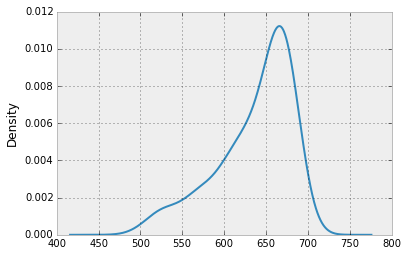

In [12]:
df['elapsed_time'].plot(kind='kde')

In [22]:
full_df = []

token = 'e2ce375f9642d036ff9362e829d26c273a2522a4'

for x in xrange(1,16):
    payload = {'access_token': token, 'per_page': '200', 'page':'{}'.format(x)}
    headers = {'content-type': 'application/json'}

    r = rq.get('https://www.strava.com/api/v3/segments/2521267/leaderboard', headers=headers, params=payload)

    data = json.loads(r.text)
    data = data['entries']
    df = pd.DataFrame(data)
    
    full_df.append(df)

In [23]:
full_df = pd.concat(full_df)

In [24]:
full_df.info

<bound method DataFrame.info of <class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 0 to 204
Data columns (total 14 columns):
activity_id         3070  non-null values
athlete_gender      2992  non-null values
athlete_id          3070  non-null values
athlete_name        3070  non-null values
athlete_profile     3070  non-null values
average_hr          907  non-null values
average_watts       2693  non-null values
distance            3070  non-null values
effort_id           3070  non-null values
elapsed_time        3070  non-null values
moving_time         3070  non-null values
rank                3070  non-null values
start_date          3070  non-null values
start_date_local    3070  non-null values
dtypes: float64(3), int64(6), object(5)>

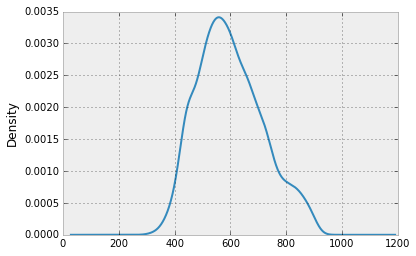

In [25]:
full_df['elapsed_time'].plot(kind='kde')

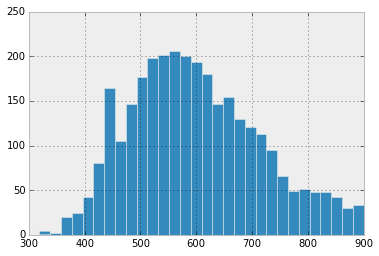

In [34]:
plt.hist(full_df['elapsed_time'].values, bins=30);

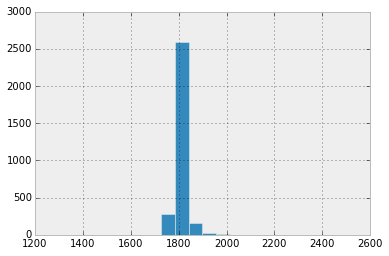

In [33]:
plt.hist(full_df['distance'].values, bins=20);

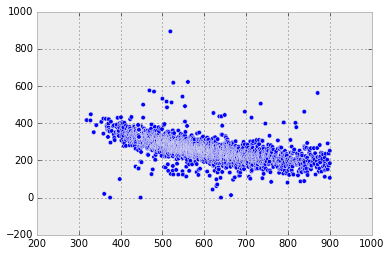

In [37]:
plt.scatter(full_df['elapsed_time'], full_df['average_watts'])

In [39]:
full_df['start_date'].plot(kind='hist')

ValueError: Invalid chart type given hist